# Pandas 
[中文文档](https://www.pypandas.cn/)
[英文文档](https://pandas.pydata.org/)

## Pandas概览

Pandas 是 Python 的核心数据分析支持库，提供了快速、灵活、明确的数据结构，旨在简单、直观地处理关系型、标记型数据。Pandas 的目标是成为 Python 数据分析实践与实战的必备高级工具，其长远目标是成为最强大、最灵活、可以支持任何语言的开源数据分析工具。经过多年不懈的努力，Pandas 离这个目标已经越来越近了。

Pandas 适用于处理以下类型的数据：

- 与 SQL 或 Excel 表类似的，含异构列的表格数据;
- 有序和无序（非固定频率）的时间序列数据;
- 带行列标签的矩阵数据，包括同构或异构型数据;
- 任意其它形式的观测、统计数据集, 数据转入 Pandas 数据结构时不必事先标记。

Pandas 的主要数据结构是 [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series)（一维数据）与 [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)（二维数据），这两种数据结构足以处理金融、统计、- 社会科学、工程等领域里的大多数典型用例。对于 R 用户，DataFrame 提供了比 R 语言 data.frame 更丰富的功能。Pandas 基于 [NumPy](https://www.numpy.org/) 开发，可以与其它第三方科学计算支持库完美集成。

Pandas 就像一把万能瑞士军刀，下面仅列出了它的部分优势 ：

- 处理浮点与非浮点数据里的**缺失数据**，表示为 NaN；
- 大小可变：**插入或删除** DataFrame 等多维对象的列；
- 自动、显式**数据对齐**：显式地将对象与一组标签对齐，也可以忽略标签，在 Series、DataFrame 计算时自动与数据对齐；
- 强大、灵活的**分组**（group by）功能：**拆分-应用-组合**数据集，**聚合、转换**数据；
- 把 Python 和 NumPy 数据结构里不规则、不同索引的数据轻松地转换为 DataFrame 对象；
- 基于智能标签，对大型数据集进行**切片、花式索引、子集分解**等操作；
- 直观地**合并（merge）、连接（join）**数据集；
- 灵活地**重塑（reshape）、透视（pivot）**数据集；
- **轴**支持结构化标签：一个刻度支持多个标签；
- 成熟的 IO 工具：读取**文本文件**（CSV 等支持分隔符的文件）、Excel 文件、数据库等来源的数据，利用超快的 HDF5 格式保存 / 加载数据；
- **时间序列**：支持日期范围生成、频率转换、移动窗口统计、移动窗口线性回归、日期位移等时间序列功能。

这些功能主要是为了解决其它编程语言、科研环境的痛点。处理数据一般分为几个阶段：数据整理与清洗、数据分析与建模、数据可视化与制表，Pandas 是处理数据的理想工具。

其它说明：

- Pandas 速度很快。Pandas 的很多底层算法都用 Cython 优化过。然而，为了保持通用性，必然要牺牲一些性能，如果专注某一功能，完全可以开发出比 Pandas 更快的专用工具。
- Pandas 是 statsmodels 的依赖项，因此，Pandas 也是 Python 中统计计算生态系统的重要组成部分。
- Pandas 已广泛应用于金融领域。

## 数据结构

| 维数  | 名称  |     描述       |
|---------------------|------------------|------------------|
|  1   | Series|  带标签的一维同构数组|
|  2   | DataFrame| 带标签的，大小可变的，二维异构表格|

### 为什么有多个数据结构？

Pandas 数据结构就像是低维数据的容器。比如，DataFrame 是 Series 的容器，Series 则是标量的容器。使用这种方式，可以在容器中以字典的形式插入或删除对象。

此外，通用 API 函数的默认操作要顾及时间序列与截面数据集的方向。多维数组存储二维或三维数据时，编写函数要注意数据集的方向，这对用户来说是一种负担；如果不考虑 C 或 Fortran 中连续性对性能的影响，一般情况下，不同的轴在程序里其实没有什么区别。Pandas 里，轴的概念主要是为了给数据赋予更直观的语义，即用“更恰当”的方式表示数据集的方向。这样做可以让用户编写数据转换函数时，少费点脑子。

处理 DataFrame 等表格数据时，index（行）或 columns（列）比 axis 0 和 axis 1 更直观。用这种方式迭代 DataFrame 的列，代码更易读易懂：
```python
for col in df.columns:
    series = df[col]
    # do something with series
```

## 大小可变与数据复制

Pandas 所有数据结构的值都是可变的，但数据结构的大小并非都是可变的，比如，Series 的长度不可改变，但 DataFrame 里就可以插入列。

Pandas 里，绝大多数方法都不改变原始的输入数据，而是复制数据，生成新的对象。 一般来说，原始输入数据**不变**更稳妥。

## 十分钟入门Pandas

本节是帮助 Pandas 新手快速上手的简介。[烹饪指南](https://www.pypandas.cn/docs/user_guide/cookbook.html)里介绍了更多实用案例。

本节以下列方式导入 Pandas 与 NumPy：

In [10]:
import numpy as np
import pandas as pd

### 生成对象

详见[数据结构](https://www.pypandas.cn/docs/getting_started/dsintro.html#dsintro)简介文档。

用值列表生成 [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) 时，Pandas 默认自动生成整数索引：

In [11]:
s = pd.Series([1,2,3,4,5,np.nan, 6,8])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    NaN
6    6.0
7    8.0
dtype: float64

用含日期时间索引与标签的Numpy数组生成[DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)

In [12]:
df1 = pd.date_range(start='20150101', periods=6)
df1

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df2 = pd.DataFrame(np.random.randn(6,4), index=df1, columns=list('ABCD'))
df2

,A,B,C,D
2015-01-01,0.495777,-0.524296,-0.089971,1.640044
2015-01-02,2.014452,-0.422936,0.991045,-0.281331
2015-01-03,0.883596,-1.794803,0.575979,-1.856528
2015-01-04,0.565125,0.858778,0.138376,0.201316
2015-01-05,-1.854077,0.368956,-1.267826,-2.464888
2015-01-06,-0.224993,-1.253118,-0.195717,-0.623797


用Series字典对象生成DataFrame

In [14]:
df3 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20150101'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3]* 4, dtype='int32'),
    'E': pd.Categorical(['test', 'train','test', 'train']),
    'F':'foo'
})
df3

,A,B,C,D,E,F
0,1.0,2015-01-01,1.0,3,test,foo
1,1.0,2015-01-01,1.0,3,train,foo
2,1.0,2015-01-01,1.0,3,test,foo
3,1.0,2015-01-01,1.0,3,train,foo


DataFrame 的列有不同[数据类型](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dtypes)。

In [15]:
df3.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

IPython支持 tab 键自动补全列名与公共属性。下面是部分可自动补全的属性：

In [16]:
df3.<TAB>
# df2.A                  df2.bool
# df2.abs                df2.boxplot
# df2.add                df2.C
# df2.add_prefix         df2.clip
# df2.add_suffix         df2.clip_lower
# df2.align              df2.clip_upper
# df2.all                df2.columns
# df2.any                df2.combine
# df2.append             df2.combine_first
# df2.apply              df2.compound
# df2.applymap           df2.consolidate
# df2.D
# 列 A、B、C、D 和 E 都可以自动补全；为简洁起见，此处只显示了部分属性。

SyntaxError: invalid syntax (<ipython-input-16-fe6086829f7d>, line 1)

### 查看数据

详见[基础用法](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics)文档。

下列代码说明如何查看 DataFrame 头部和尾部数据：

In [17]:
df2.head()

,A,B,C,D
2015-01-01,0.495777,-0.524296,-0.089971,1.640044
2015-01-02,2.014452,-0.422936,0.991045,-0.281331
2015-01-03,0.883596,-1.794803,0.575979,-1.856528
2015-01-04,0.565125,0.858778,0.138376,0.201316
2015-01-05,-1.854077,0.368956,-1.267826,-2.464888


In [18]:
df2.tail(3)

,A,B,C,D
2015-01-04,0.565125,0.858778,0.138376,0.201316
2015-01-05,-1.854077,0.368956,-1.267826,-2.464888
2015-01-06,-0.224993,-1.253118,-0.195717,-0.623797


显示索引与列名

In [19]:
df2.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df2.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

[DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) 输出底层数据的 NumPy 对象。注意，DataFrame 的列由多种数据类型组成时，该操作耗费系统资源较大，这也是 Pandas 和 NumPy 的本质区别：**NumPy 数组只有一种数据类型，DataFrame 每列的数据类型各不相同**。调用 DataFrame.to_numpy() 时，Pandas 查找支持 DataFrame 里所有数据类型的 NumPy 数据类型。还有一种数据类型是 `object`，可以把 DataFrame 列里的值强制转换为 Python 对象。

下面的 `df2` 这个 DataFrame 里的值都是浮点数，DataFrame.to_numpy() 的操作会很快，而且不复制数据。

In [21]:
df2.to_numpy()

array([[ 0.49577653, -0.5242963 , -0.08997072,  1.64004361],
       [ 2.01445165, -0.42293604,  0.99104484, -0.28133103],
       [ 0.88359618, -1.79480302,  0.57597891, -1.85652831],
       [ 0.56512531,  0.85877834,  0.13837606,  0.20131605],
       [-1.85407664,  0.36895609, -1.26782639, -2.46488774],
       [-0.22499319, -1.25311828, -0.19571662, -0.62379678]])

`df3` 这个 DataFrame 包含了多种类型，DataFrame.to_numpy() 操作就会耗费较多资源。

In [22]:
df3.to_numpy()

array([[1.0, Timestamp('2015-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2015-01-01 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2015-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2015-01-01 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

**提醒**：
DataFrame.to_numpy() 的输出不包含行索引和列标签。

[describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) 可以快速查看数据的统计摘要：

In [23]:
df2.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.313313,-0.461237,0.025314,-0.564197
std,1.288654,0.984132,0.772400,1.470442
min,-1.854077,-1.794803,-1.267826,-2.464888
25%,-0.044801,-1.070913,-0.169280,-1.548345
50%,0.530451,-0.473616,0.024203,-0.452564
75%,0.803978,0.170983,0.466578,0.080654
max,2.014452,0.858778,0.991045,1.640044


转置数据：

In [24]:
print(df2)
print("\n-------------------转置后-------------------------")
df2.T

                   A         B         C         D
2015-01-01  0.495777 -0.524296 -0.089971  1.640044
2015-01-02  2.014452 -0.422936  0.991045 -0.281331
2015-01-03  0.883596 -1.794803  0.575979 -1.856528
2015-01-04  0.565125  0.858778  0.138376  0.201316
2015-01-05 -1.854077  0.368956 -1.267826 -2.464888
2015-01-06 -0.224993 -1.253118 -0.195717 -0.623797

-------------------转置后-------------------------


,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06
A,0.495777,2.014452,0.883596,0.565125,-1.854077,-0.224993
B,-0.524296,-0.422936,-1.794803,0.858778,0.368956,-1.253118
C,-0.089971,0.991045,0.575979,0.138376,-1.267826,-0.195717
D,1.640044,-0.281331,-1.856528,0.201316,-2.464888,-0.623797


按轴排序：

In [25]:
df2.sort_index(axis=1, ascending=False)

,D,C,B,A
2015-01-01,1.640044,-0.089971,-0.524296,0.495777
2015-01-02,-0.281331,0.991045,-0.422936,2.014452
2015-01-03,-1.856528,0.575979,-1.794803,0.883596
2015-01-04,0.201316,0.138376,0.858778,0.565125
2015-01-05,-2.464888,-1.267826,0.368956,-1.854077
2015-01-06,-0.623797,-0.195717,-1.253118,-0.224993


按值排序：

In [26]:
df2.sort_values(by='B')

,A,B,C,D
2015-01-03,0.883596,-1.794803,0.575979,-1.856528
2015-01-06,-0.224993,-1.253118,-0.195717,-0.623797
2015-01-01,0.495777,-0.524296,-0.089971,1.640044
2015-01-02,2.014452,-0.422936,0.991045,-0.281331
2015-01-05,-1.854077,0.368956,-1.267826,-2.464888
2015-01-04,0.565125,0.858778,0.138376,0.201316


### 选择

**提醒**：

选择、设置标准 Python / Numpy 的表达式已经非常直观，交互也很方便，但对于生产代码，我们还是推荐优化过的 Pandas 数据访问方法：`.at`、`.iat`、`.loc` 和 `.iloc`。

详见[索引与选择数据](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing)、[多层索引与高级索引](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced)文档。

#### 获取数据

选择单列，产生`Series`，与`df2.A`等效：

In [27]:
df2['A']

2015-01-01    0.495777
2015-01-02    2.014452
2015-01-03    0.883596
2015-01-04    0.565125
2015-01-05   -1.854077
2015-01-06   -0.224993
Freq: D, Name: A, dtype: float64

用`[]`切片行：

In [28]:
df2[0:3]

,A,B,C,D
2015-01-01,0.495777,-0.524296,-0.089971,1.640044
2015-01-02,2.014452,-0.422936,0.991045,-0.281331
2015-01-03,0.883596,-1.794803,0.575979,-1.856528


In [29]:
df2['20150102': '20150103']

,A,B,C,D
2015-01-02,2.014452,-0.422936,0.991045,-0.281331
2015-01-03,0.883596,-1.794803,0.575979,-1.856528


#### 按标签选择

详见[按标签选择](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label)

用标签提取一行数据：

In [30]:
df2.loc[df1[0]]

A    0.495777
B   -0.524296
C   -0.089971
D    1.640044
Name: 2015-01-01 00:00:00, dtype: float64

用标签选择多列数据：

In [31]:
df2.loc[:,['A', 'B']]

,A,B
2015-01-01,0.495777,-0.524296
2015-01-02,2.014452,-0.422936
2015-01-03,0.883596,-1.794803
2015-01-04,0.565125,0.858778
2015-01-05,-1.854077,0.368956
2015-01-06,-0.224993,-1.253118


用标签切片，包含行与列结束点：

In [32]:
df2.loc['20150102': '20150104', ['A','B']]

,A,B
2015-01-02,2.014452,-0.422936
2015-01-03,0.883596,-1.794803
2015-01-04,0.565125,0.858778


返回对象降维：

In [33]:
df2.loc['20150102', ['A','B']]

A    2.014452
B   -0.422936
Name: 2015-01-02 00:00:00, dtype: float64

提取标量值：

In [34]:
df2.loc[df1[0],'A']

0.4957765303321702

快速访问标量，与上述方法等效

In [35]:
df2.at[df1[0], 'A']

0.4957765303321702

#### 按位置选择

详见按[位置选择](http://pandas.pydata.org/Pandas-docs/stable/indexing.html#indexing-integer)

用整数位置选择：

In [36]:
df2.iloc[3]

A    0.565125
B    0.858778
C    0.138376
D    0.201316
Name: 2015-01-04 00:00:00, dtype: float64

类似Numpy/Python，用整数切片

In [37]:
df2.iloc[3:5,0:2]

,A,B
2015-01-04,0.565125,0.858778
2015-01-05,-1.854077,0.368956


类型Numpy/Python，用整数列表按位置切片：

In [38]:
df2.iloc[[1,2,4], [0,2]]

,A,C
2015-01-02,2.014452,0.991045
2015-01-03,0.883596,0.575979
2015-01-05,-1.854077,-1.267826


显式整行切片

In [39]:
df2.iloc[1:3, :]

,A,B,C,D
2015-01-02,2.014452,-0.422936,0.991045,-0.281331
2015-01-03,0.883596,-1.794803,0.575979,-1.856528


显式整列切片：

In [40]:
df2.iloc[:,1:3]

,B,C
2015-01-01,-0.524296,-0.089971
2015-01-02,-0.422936,0.991045
2015-01-03,-1.794803,0.575979
2015-01-04,0.858778,0.138376
2015-01-05,0.368956,-1.267826
2015-01-06,-1.253118,-0.195717


显式提取值：

In [41]:
df2.iloc[1,1]

-0.4229360414145462

快速访问标量，与上述方法等效：

In [42]:
df2.iat[1,1]

-0.4229360414145462

#### 布尔索引

用单列的值选择数据：

In [43]:
df2[df2.A > 0]

,A,B,C,D
2015-01-01,0.495777,-0.524296,-0.089971,1.640044
2015-01-02,2.014452,-0.422936,0.991045,-0.281331
2015-01-03,0.883596,-1.794803,0.575979,-1.856528
2015-01-04,0.565125,0.858778,0.138376,0.201316


选择DataFrame里满足条件的值：

In [44]:
df2[df2 > 0]

,A,B,C,D
2015-01-01,0.495777,NaN,NaN,1.640044
2015-01-02,2.014452,NaN,0.991045,NaN
2015-01-03,0.883596,NaN,0.575979,NaN
2015-01-04,0.565125,0.858778,0.138376,0.201316
2015-01-05,NaN,0.368956,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN


用[isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html#pandas.Series.isin)筛选：

In [45]:
df4 = df2.copy()
df4['E'] = ['one', 'two', 'three', 'four', 'three', 'one']
df4

,A,B,C,D,E
2015-01-01,0.495777,-0.524296,-0.089971,1.640044,one
2015-01-02,2.014452,-0.422936,0.991045,-0.281331,two
2015-01-03,0.883596,-1.794803,0.575979,-1.856528,three
2015-01-04,0.565125,0.858778,0.138376,0.201316,four
2015-01-05,-1.854077,0.368956,-1.267826,-2.464888,three
2015-01-06,-0.224993,-1.253118,-0.195717,-0.623797,one


In [46]:
df4[df4['E'].isin(['two', 'four'])]

,A,B,C,D,E
2015-01-02,2.014452,-0.422936,0.991045,-0.281331,two
2015-01-04,0.565125,0.858778,0.138376,0.201316,four


### 赋值

用索引自动对齐新增列的数据：

In [47]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20150101', periods=6))
df2['F'] = s1
print(df2)

                   A         B         C         D  F
2015-01-01  0.495777 -0.524296 -0.089971  1.640044  1
2015-01-02  2.014452 -0.422936  0.991045 -0.281331  2
2015-01-03  0.883596 -1.794803  0.575979 -1.856528  3
2015-01-04  0.565125  0.858778  0.138376  0.201316  4
2015-01-05 -1.854077  0.368956 -1.267826 -2.464888  5
2015-01-06 -0.224993 -1.253118 -0.195717 -0.623797  6


按标签赋值：

In [48]:
df2.at[df1[0], 'A'] = 0
df2

,A,B,C,D,F
2015-01-01,0.000000,-0.524296,-0.089971,1.640044,1
2015-01-02,2.014452,-0.422936,0.991045,-0.281331,2
2015-01-03,0.883596,-1.794803,0.575979,-1.856528,3
2015-01-04,0.565125,0.858778,0.138376,0.201316,4
2015-01-05,-1.854077,0.368956,-1.267826,-2.464888,5
2015-01-06,-0.224993,-1.253118,-0.195717,-0.623797,6


按位置赋值：

In [49]:
df2.iat[0,1] = 0
df2

,A,B,C,D,F
2015-01-01,0.000000,0.000000,-0.089971,1.640044,1
2015-01-02,2.014452,-0.422936,0.991045,-0.281331,2
2015-01-03,0.883596,-1.794803,0.575979,-1.856528,3
2015-01-04,0.565125,0.858778,0.138376,0.201316,4
2015-01-05,-1.854077,0.368956,-1.267826,-2.464888,5
2015-01-06,-0.224993,-1.253118,-0.195717,-0.623797,6


按Numpy数组赋值：

In [50]:
df2.loc[:,"D"] = np.array([5]* len(df2))
df2

,A,B,C,D,F
2015-01-01,0.000000,0.000000,-0.089971,5,1
2015-01-02,2.014452,-0.422936,0.991045,5,2
2015-01-03,0.883596,-1.794803,0.575979,5,3
2015-01-04,0.565125,0.858778,0.138376,5,4
2015-01-05,-1.854077,0.368956,-1.267826,5,5
2015-01-06,-0.224993,-1.253118,-0.195717,5,6


用`where`条件赋值：
- 签名`DataFrame.where()`不同于`numpy.where()`。大致相当于。`df1.where(m, df2)``````np.where(m, df1, df2)`

In [51]:
df5 = df2.copy()
df5[df5 > 0] = -df5
df5

,A,B,C,D,F
2015-01-01,0.000000,0.000000,-0.089971,-5,-1
2015-01-02,-2.014452,-0.422936,-0.991045,-5,-2
2015-01-03,-0.883596,-1.794803,-0.575979,-5,-3
2015-01-04,-0.565125,-0.858778,-0.138376,-5,-4
2015-01-05,-1.854077,-0.368956,-1.267826,-5,-5
2015-01-06,-0.224993,-1.253118,-0.195717,-5,-6


### 缺失值

Pandas 主要用 `np.nan` 表示缺失数据。 计算时，默认不包含空值。详见[缺失数据](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data)。

重建索引（reindex）可以更改、添加、删除指定轴的索引，并返回数据副本，即不更改原数据。

In [52]:
df6 = df2.reindex(index=df1[0:4], columns=list(df2.columns) + ['E'])
df6.loc[df1[0]:df1[1], 'E'] = 1
df6

,A,B,C,D,F,E
2015-01-01,0.000000,0.000000,-0.089971,5,1,1.0
2015-01-02,2.014452,-0.422936,0.991045,5,2,1.0
2015-01-03,0.883596,-1.794803,0.575979,5,3,NaN
2015-01-04,0.565125,0.858778,0.138376,5,4,NaN


删除所有含缺失值得行：

In [53]:
df6.dropna(how='any')

,A,B,C,D,F,E
2015-01-01,0.000000,0.000000,-0.089971,5,1,1.0
2015-01-02,2.014452,-0.422936,0.991045,5,2,1.0


填充缺失值：

In [54]:
df6.fillna(value=4)

,A,B,C,D,F,E
2015-01-01,0.000000,0.000000,-0.089971,5,1,1.0
2015-01-02,2.014452,-0.422936,0.991045,5,2,1.0
2015-01-03,0.883596,-1.794803,0.575979,5,3,4.0
2015-01-04,0.565125,0.858778,0.138376,5,4,4.0


提取`nan`值得布尔掩码：

In [55]:
pd.isna(df6)

,A,B,C,D,F,E
2015-01-01,False,False,False,False,False,False
2015-01-02,False,False,False,False,False,False
2015-01-03,False,False,False,False,False,True
2015-01-04,False,False,False,False,False,True


### 运算
详见[二进制操作](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-binop)

#### 统计

一般情况下，运算时排除缺失值。

描述性统计：

In [56]:
df2.mean()

A    0.230684
B   -0.373854
C    0.025314
D    5.000000
F    3.500000
dtype: float64

在另一个轴(即,行)上执行同样的操作：

In [57]:
df2.mean(1)

2015-01-01    1.182006
2015-01-02    1.916512
2015-01-03    1.532954
2015-01-04    2.112456
2015-01-05    1.449411
2015-01-06    1.865234
Freq: D, dtype: float64

不同维度对象运算时，要先对齐。此外，Pandas自动沿指定维度广播。

In [58]:
s2 = pd.Series([1,3,5, np.nan, 6, 8], index=df1).shift(2)
s2

2015-01-01    NaN
2015-01-02    NaN
2015-01-03    1.0
2015-01-04    3.0
2015-01-05    5.0
2015-01-06    NaN
Freq: D, dtype: float64

In [59]:
df2.sub(s2, axis='index')

,A,B,C,D,F
2015-01-01,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-03,-0.116404,-2.794803,-0.424021,4.0,2.0
2015-01-04,-2.434875,-2.141222,-2.861624,2.0,1.0
2015-01-05,-6.854077,-4.631044,-6.267826,0.0,0.0
2015-01-06,NaN,NaN,NaN,NaN,NaN


#### Apply函数

Apply函数处理数据

In [60]:
df2.apply(np.cumsum)

,A,B,C,D,F
2015-01-01,0.000000,0.000000,-0.089971,5,1
2015-01-02,2.014452,-0.422936,0.901074,10,3
2015-01-03,2.898048,-2.217739,1.477053,15,6
2015-01-04,3.463173,-1.358961,1.615429,20,10
2015-01-05,1.609096,-0.990005,0.347603,25,15
2015-01-06,1.384103,-2.243123,0.151886,30,21


In [61]:
df2.apply(lambda x: x.max() - x.min())

A    3.868528
B    2.653581
C    2.258871
D    0.000000
F    5.000000
dtype: float64

#### 直方图

详见[直方图与离散化](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-discretization)。

In [62]:
s3 = pd.Series(np.random.randint(0, 7, size=10))
s3

0    6
1    3
2    4
3    0
4    2
5    3
6    1
7    6
8    4
9    3
dtype: int32

In [63]:
s3.value_counts()

3    3
6    2
4    2
2    1
1    1
0    1
dtype: int64

#### 字符串方法

Series 的 `str` 属性包含一组字符串处理功能，如下列代码所示。注意，`str` 的模式匹配默认使用[正则表达式](https://docs.python.org/3/library/re.html)。详见[矢量字符串方法](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods)。

In [64]:
s4 = pd.Series(['A','B', 'C', 'Aaba','Baca', np.nan, 'CABA', 'dog', 'cat'])
s4.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 合并（Merge）

#### 结合（Concat）
Pandas 提供了多种将 Series、DataFrame 对象组合在一起的功能，用索引与关联代数功能的多种设置逻辑可执行连接（join）与合并（merge）操作。

详见[合并](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging)。

`concat()` 用于连接 Pandas 对象：

In [65]:
df7 = pd.DataFrame(np.random.randn(10, 4))
df7

,0,1,2,3
0,0.510118,1.297539,-0.226940,-1.298777
1,-0.156357,-0.501054,-0.884452,-0.642022
2,-0.084234,0.522088,0.559494,0.614627
3,-1.877422,1.173498,-0.590322,1.283285
4,0.599235,-0.459644,-0.991115,0.602145
5,-0.918474,1.273175,0.391105,1.760057
6,1.454607,0.301366,0.569512,-0.853014
7,0.533967,2.432820,-0.116690,-1.042676
8,0.788732,0.988278,-0.317310,-0.555627
9,0.717240,-0.003718,2.191069,1.661000


In [66]:
# 分解为多组
pieces = [df7[:3], df7[3:7],df7[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.510118,1.297539,-0.226940,-1.298777
1,-0.156357,-0.501054,-0.884452,-0.642022
2,-0.084234,0.522088,0.559494,0.614627
3,-1.877422,1.173498,-0.590322,1.283285
4,0.599235,-0.459644,-0.991115,0.602145
5,-0.918474,1.273175,0.391105,1.760057
6,1.454607,0.301366,0.569512,-0.853014
7,0.533967,2.432820,-0.116690,-1.042676
8,0.788732,0.988278,-0.317310,-0.555627
9,0.717240,-0.003718,2.191069,1.661000


#### 连接（join）

SQL 风格的合并。 详见[数据库风格连接](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join)。

In [67]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1,2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4,5]})
print(left)
print('-------------------')
print(right)

   key  lval
0  foo     1
1  foo     2
-------------------
   key  rval
0  foo     4
1  foo     5


In [68]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


还有一个例子：

In [69]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1,2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4,5]})
print(left)
print('-------------------')
print(right)

   key  lval
0  foo     1
1  bar     2
-------------------
   key  rval
0  foo     4
1  bar     5


In [70]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### 追加（Append）

为 DataFrame 追加行。详见[追加](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-concatenation)文档。

In [71]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.288486,0.071832,-0.573014,-0.740909
1,-0.437346,-0.341157,0.652473,1.647469
2,-0.041598,1.400381,0.034764,0.030222
3,0.269048,0.363632,1.939811,0.371858
4,1.135352,-1.729701,1.319469,0.695883
5,0.024442,0.259727,-0.255833,-1.128733
6,1.310012,1.068041,-0.961124,0.513195
7,-0.811828,2.385519,-0.211693,-1.799050


In [72]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.288486,0.071832,-0.573014,-0.740909
1,-0.437346,-0.341157,0.652473,1.647469
2,-0.041598,1.400381,0.034764,0.030222
3,0.269048,0.363632,1.939811,0.371858
4,1.135352,-1.729701,1.319469,0.695883
5,0.024442,0.259727,-0.255833,-1.128733
6,1.310012,1.068041,-0.961124,0.513195
7,-0.811828,2.385519,-0.211693,-1.799050
8,0.269048,0.363632,1.939811,0.371858


### 分组（Grouping）
“group by” 指的是涵盖下列一项或多项步骤的处理流程：

- 分割：按条件把数据分割成多组；
- 应用：为每组单独应用函数；
- 组合：将处理结果组合成一个数据结构。

详见[中文文档](https://www.pypandas.cn/docs/getting_started/10min.html#%E5%88%86%E7%BB%84%EF%BC%88grouping%EF%BC%89)
[官方](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)

In [74]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                  'B': ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                  'C': np.random.randn(8), 'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.039872,0.388262
1,bar,one,-0.512593,1.288747
2,foo,two,2.751863,-0.549265
3,bar,three,1.826074,-0.152341
4,foo,two,0.565190,1.234779
5,bar,two,-0.544772,-1.006594
6,foo,one,-0.232166,0.317457
7,foo,three,1.150941,0.672226


##### 先分组，再用`sum`函数计算每组的汇总数据

In [75]:
df.groupby('A').sum()

,C,D
A,,
bar,0.768709,0.129812
foo,5.275699,2.063459


##### 多列分组后，生成多层索引，也可以应用 sum 函数：

In [76]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.512593  1.288747
    three  1.826074 -0.152341
    two   -0.544772 -1.006594
foo one    0.807705  0.705719
    three  1.150941  0.672226
    two    3.317053  0.685514

### 重塑（Reshaping）
详见[多层索引](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical)与[重塑](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking)。

#### 堆叠（Stack）

In [92]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
   ....:            ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A', 'B'])
df2 = df[:4]

In [101]:
print(df, df2, sep='\n'*3)

                     A         B
first second                    
bar   one     1.192086 -1.617945
      two    -0.541903 -0.763716
baz   one     0.002802 -0.073066
      two     1.086178  0.505617
foo   one     0.495192 -1.072288
      two     0.447279 -1.292418
qux   one    -0.317342 -0.857073
      two     0.452839  0.217488


                     A         B
first second                    
bar   one     1.192086 -1.617945
      two    -0.541903 -0.763716
baz   one     0.002802 -0.073066
      two     1.086178  0.505617


In [105]:
# stack()方法把 DataFrame 列压缩至一层
stacked = df2.stack() 
stacked

first  second   
bar    one     A    1.192086
               B   -1.617945
       two     A   -0.541903
               B   -0.763716
baz    one     A    0.002802
               B   -0.073066
       two     A    1.086178
               B    0.505617
dtype: float64

In [113]:
# 压缩后的 DataFrame 或 Series 具有多层索引， stack() 的逆操作是 unstack()，默认为拆叠最后一层：
stacked.unstack()

A         B
first second                    
bar   one     1.192086 -1.617945
      two    -0.541903 -0.763716
baz   one     0.002802 -0.073066
      two     1.086178  0.505617

In [108]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.192086 -0.541903
      B -1.617945 -0.763716
baz   A  0.002802  1.086178
      B -0.073066  0.505617

In [111]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.192086  0.002802
       B -1.617945 -0.073066
two    A -0.541903  1.086178
       B -0.763716  0.505617

### 数据透视表（Pivot Tables）
详见[数据透视表](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot)。

In [115]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B': ['A', 'B', 'C'] * 4,
   .....:                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D': np.random.randn(12),
   .....:                    'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.310437,0.596380
1,one,B,foo,1.015415,-0.658475
2,two,C,foo,0.526326,1.851567
3,three,A,bar,1.502380,-1.316516
4,one,B,bar,-1.752622,0.461646
5,one,C,bar,0.888497,0.703693
6,two,A,foo,-0.629228,0.718748
7,three,B,foo,2.389784,0.049419
8,one,C,foo,-0.890217,0.858487
9,one,A,bar,-0.261845,-1.190759


In [116]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.261845  0.310437
      B -1.752622  1.015415
      C  0.888497 -0.890217
three A  1.502380       NaN
      B       NaN  2.389784
      C -0.216170       NaN
two   A       NaN -0.629228
      B -0.040979       NaN
      C       NaN  0.526326

### 时间序列(TimeSeries)
Pandas 为频率转换时重采样提供了虽然简单易用，但强大高效的功能，
如，将秒级的数据转换为 5 分钟为频率的数据。这种操作常见于财务应用程序，但又不仅限于此。详见[时间序列](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)。

In [132]:
rng = pd.date_range('1/1/2020', periods=10, freq='S')
ts = pd.Series(np.random.randint(0, 20, len(rng)), index=rng)

In [133]:
print(rng, ts, sep='\n'*2)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')

2020-01-01 00:00:00    17
2020-01-01 00:00:01     0
2020-01-01 00:00:02     7
2020-01-01 00:00:03    12
2020-01-01 00:00:04     1
2020-01-01 00:00:05    15
2020-01-01 00:00:06     0
2020-01-01 00:00:07    10
2020-01-01 00:00:08    14
2020-01-01 00:00:09     8
Freq: S, dtype: int32


In [134]:
ts.resample('5Min').sum()

2020-01-01    84
Freq: 5T, dtype: int32

In [138]:
# 时区表示
rng = pd.date_range('2020/8/1', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts_UTC = ts.tz_localize('UTC')
print(ts, ts_UTC, sep='\n'*3)

2020-08-01   -0.938967
2020-08-02    0.056395
2020-08-03   -1.249805
2020-08-04   -0.300962
2020-08-05   -1.635329
Freq: D, dtype: float64


2020-08-01 00:00:00+00:00   -0.938967
2020-08-02 00:00:00+00:00    0.056395
2020-08-03 00:00:00+00:00   -1.249805
2020-08-04 00:00:00+00:00   -0.300962
2020-08-05 00:00:00+00:00   -1.635329
Freq: D, dtype: float64


In [139]:
# 转换成其他时区
ts_UTC.tz_convert('US/Eastern')

2020-07-31 20:00:00-04:00   -0.938967
2020-08-01 20:00:00-04:00    0.056395
2020-08-02 20:00:00-04:00   -1.249805
2020-08-03 20:00:00-04:00   -0.300962
2020-08-04 20:00:00-04:00   -1.635329
Freq: D, dtype: float64

In [143]:
# 转换时间段
rng = pd.date_range('2020/8/1', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), rng)
ps = ts.to_period()
pts = ps.to_timestamp()
print(ts, ps, pts, sep='\n'*3)

2020-08-31    2.606606
2020-09-30    1.631934
2020-10-31    1.167378
2020-11-30   -0.376675
2020-12-31   -0.196782
Freq: M, dtype: float64


2020-08    2.606606
2020-09    1.631934
2020-10    1.167378
2020-11   -0.376675
2020-12   -0.196782
Freq: M, dtype: float64


2020-08-01    2.606606
2020-09-01    1.631934
2020-10-01    1.167378
2020-11-01   -0.376675
2020-12-01   -0.196782
Freq: MS, dtype: float64


### 可视化
详见[可视化文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)。

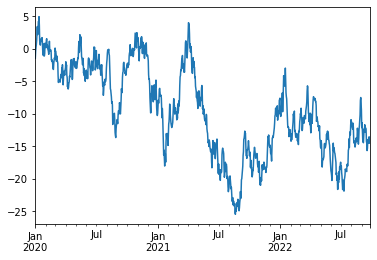

In [147]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2020/1/1', periods=1000))
ts = ts.cumsum()
ts.plot()

##### DataFrame 的 [plot() ](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)方法可以快速绘制所有带标签的列：

<Figure size 2400x800 with 0 Axes>

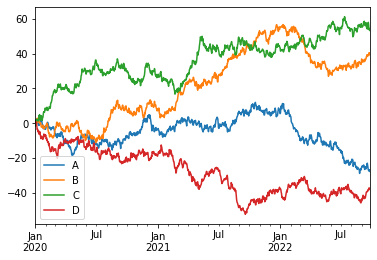

In [154]:
import matplotlib.pyplot as plt 
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(figsize=(30,10),dpi=80)
df.plot()
plt.legend(loc='best')